# Reward Training vs. Reward Competiton

In [1]:
import sys
import os

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(PROJECT_ROOT)

from Reward_Training.rt_extension import Reward_Training
from Reward_Competition.rc_extension import Reward_Competition
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
# Reward Competition files
experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Competition\combined_cohorts"

csv_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Competition\combined_cohorts\manual_scoring_combined.xlsx"

# experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Competition\Test"

In [3]:
# Reward Training files
# NAc
rt_NAc_experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\Day10\NAc"
nac_color = '#15616F'

# mPFC
rt_mPFC_experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\Day10\mPFC"
mPFC_color = '#FFAF00'


### Reward Competition Pre-processing

In [4]:
rc_exp = Reward_Competition(experiment_folder_path=experiment_path, behavior_folder_path=None)
rc_exp.rtc_processing()
rc_exp.read_manual_scoring(csv_path)
rc_exp.merge_data()
rc_exp.remove_tangles()   # Remove sound cues and winner array indexes where there are tangles
rc_exp.remove_specified_subjects()   # Remove specified subjects from the analysis
rc_exp.extract_da_columns()   # Grab only essential columns for analysis
rc_exp.find_first_port_entry_after_sound_cue()
rc_exp.compute_EI_DA()
rc_exp.compute_rtc_da_metrics().head()
rc_exp.split_by_winner()

Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Competition\combined_cohorts\n6-240912-062009\Notes.txt
read from t=0s to t=2073.36s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Competition\combined_cohorts\n6-240913-062437\Notes.txt
read from t=0s to t=2044.96s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Competition\combined_cohorts\n6-240914-065650\Notes.txt
read from t=0s to t=2047.26s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Competition\combined_cohorts\n6-240914-095611\Notes.txt
read from t=0s to t=2053.26s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Competition\combined_cohorts\n7-240912-095235\Notes.txt
read from t=0s to t=1955.86s
Found Synapse note file: C:\Users\alber\

### Reward Training Pre-processing

In [5]:
rt_NAc_exp = Reward_Training(experiment_folder_path=rt_NAc_experiment_path, behavior_folder_path=None)
rt_mPFC_exp = Reward_Training(experiment_folder_path=rt_mPFC_experiment_path, behavior_folder_path=None)

Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\Day10\NAc\n5-240911-062153\Notes.txt
read from t=0s to t=1769.26s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\Day10\NAc\n6-240911-085311\Notes.txt
read from t=0s to t=1687.17s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\Day10\NAc\n7-240911-111928\Notes.txt
read from t=0s to t=1688.06s
read from t=0s to t=3853.09s
read from t=0s to t=3853.09s
read from t=0s to t=3851.18s
read from t=0s to t=3851.18s
read from t=0s to t=3845.28s
read from t=0s to t=3845.28s
read from t=0s to t=3845.28s
read from t=0s to t=3845.28s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\Day10\mPFC\p1-240607-065311\Notes.txt
read from t=0s to t=1684.75s
Fou

In [6]:
def run_rtc_pipeline(exp, experiment_path):
    exp.rtc_processing()
    exp.create_base_df(experiment_path)
    exp.remove_specified_subjects()
    exp.extract_da_columns()
    exp.find_first_port_entry_after_sound_cue()
    # exp.compute_closest_port_offset(
    #     PE_column='first_PE_after_sound_cue',
    #     offset_column='filtered_port_entry_offset'
    # )
    exp.compute_EI_DA()
    exp.compute_rtc_da_metrics()

run_rtc_pipeline(rt_NAc_exp, rt_NAc_experiment_path)
run_rtc_pipeline(rt_mPFC_exp, rt_mPFC_experiment_path)

Processing trial n5-240911-062153...
Processing trial n6-240911-085311...
Processing trial n7-240911-111928...
Processing trial nn1-250202-133348...
Processing trial nn2-250202-133348...
Processing trial nn3-250202-122021...
Processing trial nn4-250202-122021...
Processing trial nn5-250202-082015...
Processing trial nn6-250202-082015...
Processing trial nn7-250202-070333...
Processing trial nn8-250202-070333...
Processing trial p1-240607-065311...
Processing trial p2-240607-092425...
Processing trial p3-240607-115203...
Processing trial p5-240911-050744...
Processing trial p6-240911-073819...
Processing trial p7-240911-100647...
Processing trial p8-240911-123255...
Processing trial pp1-250202-105839...
Processing trial pp2-250202-105839...
Processing trial pp3-250202-093829...
Processing trial pp4-250202-093829...
Processing trial pp5-250202-054445...
Processing trial pp6-250202-054445...
Processing trial pp7-250202-042018...
Processing trial pp8-250202-042018...


In [7]:
# rt_NAc_exp.da_df : the “alone” training data for NAc
# rt_mPFC_exp.da_df: the “alone” training data for mPFC
# rc_exp.winner_df : the “competition” data (only winning bouts)
# rc_exp.loser_df  : the “competition” data (only losing bouts) — pick whichever you want

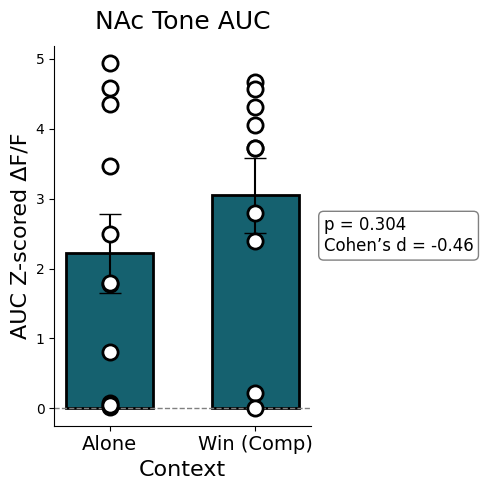

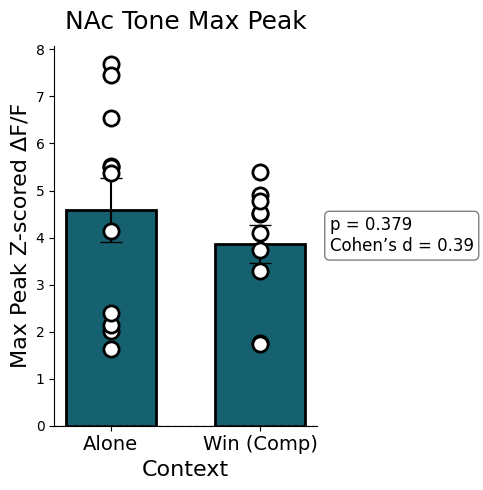

In [11]:
stats = rc_exp.plot_comp_vs_alone_by_subject(
    df_alone     = rt_NAc_exp.da_df,
    df_comp      = rc_exp.winner_df,
    metric_name  = 'AUC',
    behavior     = 'Tone',
    brain_region = 'NAc',
    brain_color = nac_color,
    directory_path = None
)

stats = rc_exp.plot_comp_vs_alone_by_subject(
    df_alone     = rt_NAc_exp.da_df,
    df_comp      = rc_exp.winner_df,
    metric_name  = 'Max Peak',
    behavior     = 'Tone',
    brain_region = 'NAc',
    brain_color = nac_color,
    directory_path = None
)



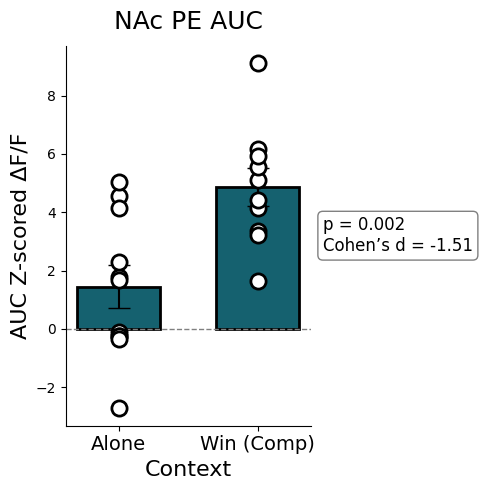

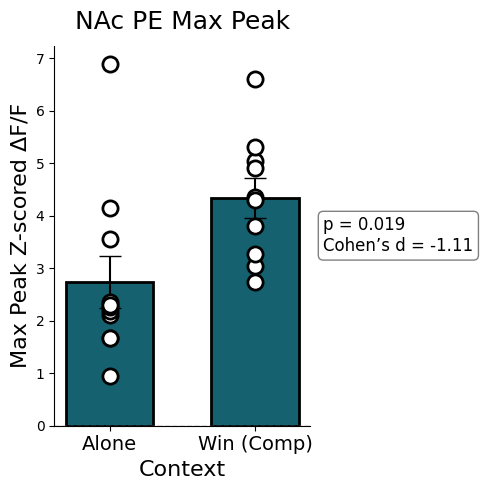

In [12]:
stats = rc_exp.plot_comp_vs_alone_by_subject(
    df_alone     = rt_NAc_exp.da_df,
    df_comp      = rc_exp.winner_df,
    metric_name  = 'AUC',
    behavior     = 'PE',
    brain_region = 'NAc',
    brain_color = nac_color,
    directory_path = None
)

stats = rc_exp.plot_comp_vs_alone_by_subject(
    df_alone     = rt_NAc_exp.da_df,
    df_comp      = rc_exp.winner_df,
    metric_name  = 'Max Peak',
    behavior     = 'PE',
    brain_region = 'NAc',
    brain_color = nac_color,
    directory_path = None
)

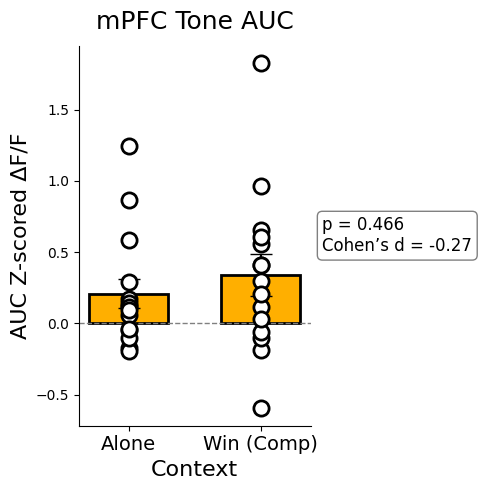

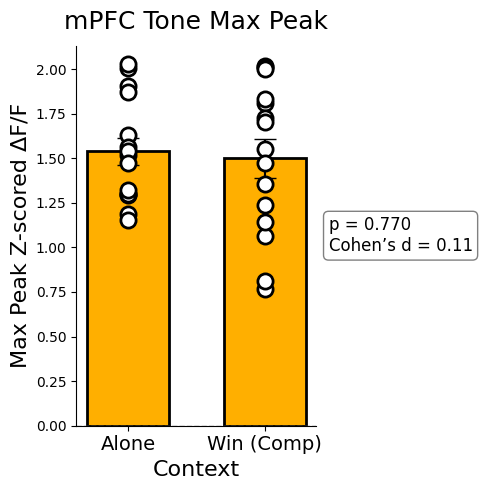

In [15]:
stats = rc_exp.plot_comp_vs_alone_by_subject(
    df_alone     = rt_mPFC_exp.da_df,
    df_comp      = rc_exp.winner_df,
    metric_name  = 'AUC',
    behavior     = 'Tone',
    brain_region = 'mPFC',
    brain_color = mPFC_color,
    directory_path = None
)

stats = rc_exp.plot_comp_vs_alone_by_subject(
    df_alone     = rt_mPFC_exp.da_df,
    df_comp      = rc_exp.winner_df,
    metric_name  = 'Max Peak',
    behavior     = 'Tone',
    brain_region = 'mPFC',
    brain_color = mPFC_color,
    directory_path = None
)

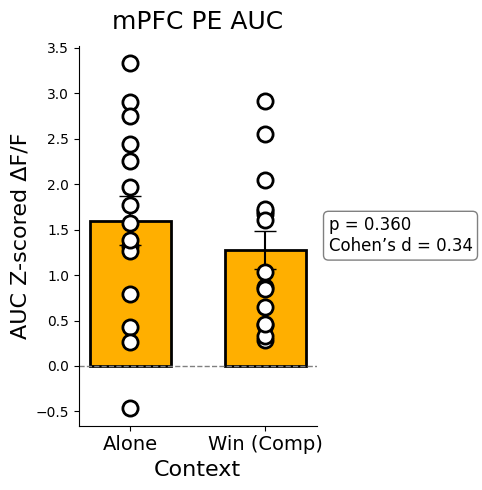

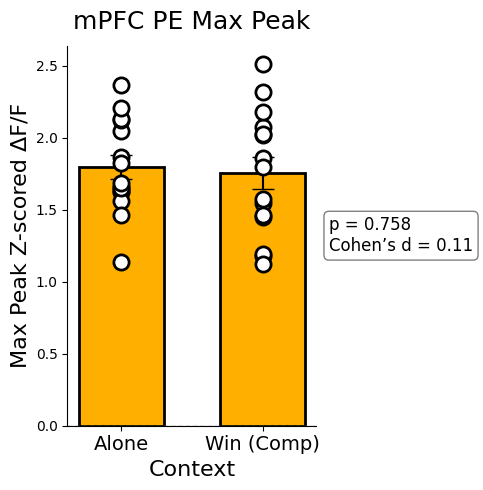

: 

In [ ]:
stats = rc_exp.plot_comp_vs_alone_by_subject(
    df_alone     = rt_mPFC_exp.da_df,
    df_comp      = rc_exp.winner_df,
    metric_name  = 'AUC',
    behavior     = 'PE',
    brain_region = 'mPFC',
    brain_color = mPFC_color,
    directory_path = None
)

stats = rc_exp.plot_comp_vs_alone_by_subject(
    df_alone     = rt_mPFC_exp.da_df,
    df_comp      = rc_exp.winner_df,
    metric_name  = 'Max Peak',
    behavior     = 'PE',
    brain_region = 'mPFC',
    brain_color = mPFC_color,
    directory_path = None
)

In [ ]:
# rc_exp.reward_comp_vs_alone(
#     df_alone   = rt_NAc_exp.da_df,
#     df_comp    = rc_exp.winner_df,
#     metric_name='AUC',
#     behavior   ='PE',
#     brain_region='NAc',
#     directory_path=None
# )

In [ ]:
# rc_exp.reward_comp_vs_alone(
#     df_alone   = rt_NAc_exp.da_df,
#     df_comp    = rc_exp.winner_df,
#     metric_name='AUC',
#     behavior   ='Tone',
#     brain_region='NAc',
#     directory_path=None
# )